In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
ds = pd.read_excel("C:/Users/AYUSH TRIPATHI/OneDrive/Documents/spam.xlsx")

# Display the first few rows of the DataFrame
print(ds.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
ds = ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])


In [6]:
ds.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
ds['v1'] = le.fit_transform(ds['v1'])

In [9]:
ds.v1.value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [10]:
#checking duplicates
ds.duplicated().sum()

403

In [11]:
ds =ds.drop_duplicates()

In [12]:
ds.shape

(5169, 2)

In [13]:
ham = ds[ds['v1']==0].sample(653)

In [14]:
ham.head()

,v1,v2
208,0,You please give us connection today itself bef...
594,0,I met you as a stranger and choose you as my f...
4864,0,I'm really sorry I lit your hair on fire
385,0,It took Mr owl 3 licks
2198,0,I'm in a movie. Call me 4 wat?


In [15]:
spam = ds[ds['v1']==1]

In [16]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 2 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      653 non-null    int32 
 1   v2      653 non-null    object
dtypes: int32(1), object(1)
memory usage: 12.8+ KB


In [17]:
ds2 = pd.concat([ham,spam],axis=0)

In [18]:
ds2.head()

,v1,v2
208,0,You please give us connection today itself bef...
594,0,I met you as a stranger and choose you as my f...
4864,0,I'm really sorry I lit your hair on fire
385,0,It took Mr owl 3 licks
2198,0,I'm in a movie. Call me 4 wat?


In [19]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 208 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      1306 non-null   int32 
 1   v2      1306 non-null   object
dtypes: int32(1), object(1)
memory usage: 25.5+ KB


In [20]:
ds2.duplicated().sum(), ds2.isnull().sum()

(0,
 v1    0
 v2    0
 dtype: int64)

In [21]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   ---------------------- --------------- 174.1/300.2 kB 876.1 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
hamt = ds2[ds2['v1']==1]
spamt = ds2[ds2['v1']==0]

In [24]:
hamt.head()

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [25]:
ham_txt = " ".join(hamt['v2'])
len(ham_txt)

90695

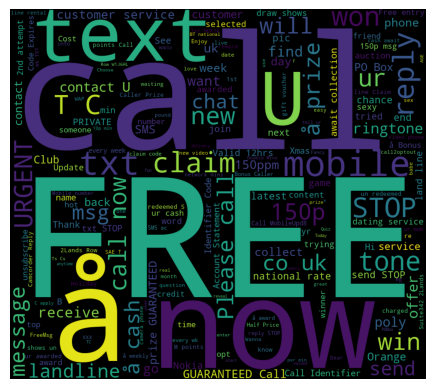

In [26]:
wc = WordCloud(width=900,height=800).generate(ham_txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [27]:
spamt.head()

,v1,v2
208,0,You please give us connection today itself bef...
594,0,I met you as a stranger and choose you as my f...
4864,0,I'm really sorry I lit your hair on fire
385,0,It took Mr owl 3 licks
2198,0,I'm in a movie. Call me 4 wat?


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ds2['v2'],ds2['v1'],test_size=0.2,random_state=42,stratify=ds2['v1'])

In [29]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1044,), (1044,), (262,), (262,))

In [30]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [31]:
import spacy

In [32]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
     --------------------------------------- 0.1/12.8 MB 479.3 kB/s eta 0:00:27
      -------------------------------------- 0.3/12.8 MB 947.5 kB/s eta 0:00:14
     - -------------------------------------- 0.6/12.8 MB 1.7 MB/s eta 0:00:08
     --- ------------------------------------ 1.0/12.8 MB 2.9 MB/s eta 0:00:05
     ---- ----------------------------------- 1.5/12.8 MB 3.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 3.8 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 3.8

In [33]:
nlp = spacy.load("en_core_web_sm")

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(xtrain, ytrain)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [35]:
ypred = model.predict(xtest)
ypred[:5]

array([0, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import classification_report as cr
print(cr(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       131
           1       0.97      0.98      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



In [37]:
#testing 
sample_txt = 'hurray !! you won a 25 million dollors'

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load spaCy model (make sure you have spaCy installed)
nlp = spacy.load("en_core_web_sm")

# Assuming xtrain and ytrain are your training data
model = Pipeline([
    ('text preprocessing', TfidfVectorizer(
        tokenizer=lambda txt: [token.lemma_ for token in nlp(txt)],
        stop_words='english',
        ngram_range=(1, 2),
        max_features=500,
        token_pattern=None  # Set token_pattern to None
    )),
    ('text classifier', RandomForestClassifier())
])

# Fit the model on the training data
model.fit(xtrain, ytrain)


C:\Users\AYUSH TRIPATHI\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english', token_pattern=None,
                                 tokenizer=<function <lambda> at 0x000001AA0C943240>)),
                ('text classifier', RandomForestClassifier())])

In [39]:
ypred = model.predict([sample_txt])

In [40]:
print(ypred[0])

1
